In [1]:
# Dependencies and Setup
import pandas as pd
import requests
import numpy as np
import io
import matplotlib.pyplot as plt
from pathlib import Path
from pprint import pprint

# Import API key
from config import geoapify_key


In [2]:
 # Downloading the csv file from your GitHub account
# Make sure the url is the raw version of the file on GitHub
url = "https://raw.githubusercontent.com/brown016340/Project-1/development/Resources/2018_Squirrel_Data.csv"
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
squirrel_df = pd.read_csv(io.StringIO(download.decode('utf-8')))

# Printing out the first 5 rows of the dataframe
squirrel_df.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)


In [3]:
# Total Population of observations of squirrels in dataset
population_df = pd.DataFrame(squirrel_df["Primary Fur Color"].value_counts())
population_df

,count
Primary Fur Color,
Gray,2473
Cinnamon,392
Black,103


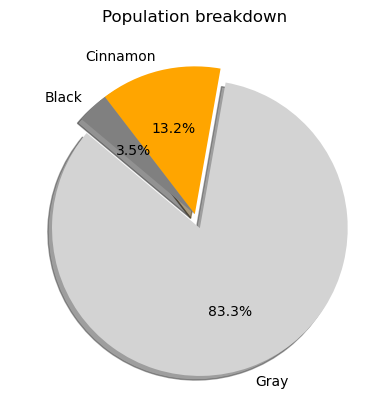

In [4]:
# Do a pie plot to compare the numbers of each color squirrel
labels = ["Gray", "Cinnamon", "Black"]
sizes = population_df["count"]
colors = ["lightgray", "orange", "grey"]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Population breakdown")

plt.show()

In [5]:
# Lets get a total for the number of times a given behavior is exhibited and not exhibited
squirrel_df["Approaches"].value_counts()

Approaches
False    2845
True      178
Name: count, dtype: int64

In [6]:
# Filter down DF to rows where a given behavior is True
# In this case, lets narrow it to where Approaches is True
approaches = squirrel_df[squirrel_df["Approaches"] == True]

# Reset Index
approaches = approaches.reset_index(drop=True)

approaches.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.957956,40.795934,38C-PM-1014-09,38C,PM,10142018,9,Adult,Black,NaN,...,False,False,False,False,False,True,False,False,NaN,POINT (-73.9579564338627 40.7959337795027)
1,-73.958497,40.798289,40B-AM-1019-03,40B,AM,10192018,3,Juvenile,Gray,White,...,False,False,False,False,True,True,False,False,NaN,POINT (-73.9584970643213 40.7982886348696)
2,-73.974563,40.769260,5E-AM-1008-06,05E,AM,10082018,6,Adult,Cinnamon,White,...,False,False,False,False,False,True,False,False,NaN,POINT (-73.9745630038492 40.7692602628745)
3,-73.961071,40.791483,32D-AM-1013-06,32D,AM,10132018,6,Adult,Cinnamon,NaN,...,False,False,False,False,True,True,False,False,NaN,POINT (-73.9610705592868 40.7914829661051)
4,-73.952868,40.792581,36I-PM-1007-13,36I,PM,10072018,13,Adult,Gray,Cinnamon,...,False,False,False,False,True,True,False,False,NaN,POINT (-73.9528682507794 40.7925807808307)


In [7]:
# What is the breakdown of the number of squirrels with each fur color that approached?
approaches_df = pd.DataFrame(approaches["Primary Fur Color"].value_counts())
approaches_df

,count
Primary Fur Color,
Gray,126
Cinnamon,44
Black,6


In [8]:
# Lets figure out what percentage of squirrels of a given color exhibit a behavior.
approaches_percent = pd.merge(approaches_df, population_df, on="Primary Fur Color")

# Rename columns
approaches_percent = approaches_percent.rename(columns={"count_x": "Approaches", "count_y": "Population"})
approaches_percent["Approaches_Percentage"] = approaches_percent["Approaches"] / approaches_percent["Population"]
approaches_percent["Approaches_Percentage"] = approaches_percent["Approaches_Percentage"].map("{:,.2%}".format)

approaches_percent

,Approaches,Population,Approaches_Percentage
Primary Fur Color,,,
Gray,126,2473,5.10%
Cinnamon,44,392,11.22%
Black,6,103,5.83%


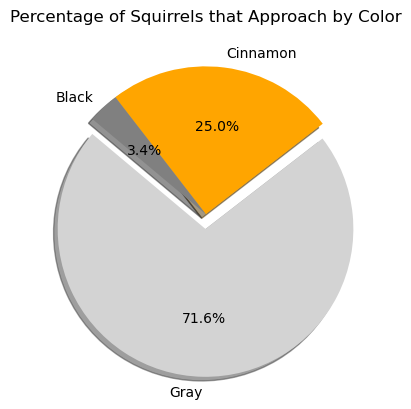

In [9]:
# Lets make a pie chart for the ones that approach, breaking it down by color
labels = ["Gray", "Cinnamon", "Black"]
sizes = approaches_df["count"]
colors = ["lightgray", "orange", "grey"]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Percentage of Squirrels that Approach by Color")

plt.show()

In [10]:
# Narrow down DF to rows where a given behavior is True
# In this case, lets narrow it to where Tail Flags is True
flags = squirrel_df[squirrel_df["Tail flags"] == True]

# Reset Index
flags = flags.reset_index(drop=True)

flags.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.967429,40.782972,21C-PM-1006-01,21C,PM,10062018,1,Adult,Gray,NaN,...,False,False,False,True,True,False,False,False,NaN,POINT (-73.9674285955293 40.7829723919744)
1,-73.967113,40.778486,17F-AM-1007-07,17F,AM,10072018,7,Adult,Gray,White,...,False,False,False,True,False,False,True,False,NaN,POINT (-73.9671130680114 40.7784859700171)
2,-73.974207,40.775796,12B-AM-1007-01,12B,AM,10072018,1,Adult,Gray,Cinnamon,...,False,False,False,True,False,False,True,False,NaN,POINT (-73.9742073452913 40.7757957380463)
3,-73.954665,40.794764,38G-PM-1020-09,38G,PM,10202018,9,Adult,Gray,"Cinnamon, White",...,False,False,False,True,False,False,True,False,NaN,POINT (-73.9546654184146 40.7947639241491)
4,-73.964475,40.788384,28C-PM-1006-01,28C,PM,10062018,1,Adult,Gray,Cinnamon,...,False,False,False,True,False,False,False,True,gnd to tree,POINT (-73.964474836001 40.7883840104749)


In [11]:
# What is the breakdown of the number of squirrels with each fur color that flagged their tail?
flags_df = pd.DataFrame(flags["Primary Fur Color"].value_counts())
flags_df

,count
Primary Fur Color,
Gray,122
Cinnamon,26
Black,6


In [12]:
# Lets figure out what percentage of squirrels of a given color exhibit a behavior.
flags_percent = pd.merge(flags_df, population_df, on="Primary Fur Color")

# Rename columns
flags_percent = flags_percent.rename(columns={"count_x": "Flags", "count_y": "Population"})
flags_percent["Flags_Percentage"] = flags_percent["Flags"] / flags_percent["Population"]
flags_percent["Flags_Percentage"] = flags_percent["Flags_Percentage"].map("{:,.2%}".format)

flags_percent

,Flags,Population,Flags_Percentage
Primary Fur Color,,,
Gray,122,2473,4.93%
Cinnamon,26,392,6.63%
Black,6,103,5.83%


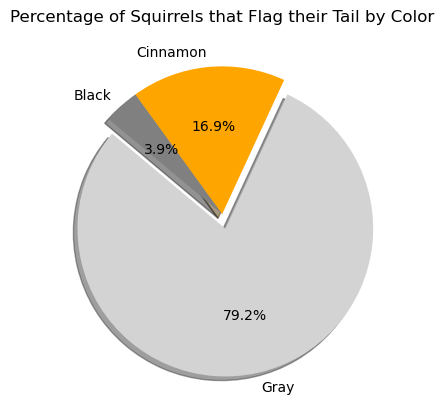

In [13]:
# Lets make a pie chart for the ones that flagged, breaking it down by color
labels = ["Gray", "Cinnamon", "Black"]
sizes = flags_df["count"]
colors = ["lightgray", "orange", "grey"]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Percentage of Squirrels that Flag their Tail by Color")

plt.show()

In [14]:
# Narrow down DF to rows where a given behavior is True
# In this case, lets narrow it to where Tail Twitches is True
twitches = squirrel_df[squirrel_df["Tail twitches"] == True]

# Reset Index
twitches = twitches.reset_index(drop=True)

twitches.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.968361,40.772591,11H-AM-1010-03,11H,AM,10102018,3,Adult,Cinnamon,White,...,False,False,False,False,True,False,True,False,NaN,POINT (-73.9683613516225 40.7725908847499)
1,-73.967429,40.782972,21C-PM-1006-01,21C,PM,10062018,1,Adult,Gray,NaN,...,False,False,False,True,True,False,False,False,NaN,POINT (-73.9674285955293 40.7829723919744)
2,-73.964003,40.782031,22F-PM-1014-06,22F,PM,10142018,6,Adult,Gray,NaN,...,False,False,False,False,True,False,True,False,NaN,POINT (-73.9640032826529 40.7820309825448)
3,-73.964987,40.776493,16I-AM-1008-01,16I,AM,10082018,1,Adult,Cinnamon,"Gray, White",...,False,False,False,False,True,False,True,False,NaN,POINT (-73.9649866016038 40.7764929694457)
4,-73.967063,40.773499,12I-AM-1013-01,12I,AM,10132018,1,Adult,Cinnamon,White,...,False,False,False,False,True,False,False,True,NaN,POINT (-73.9670628558161 40.77349914209411)


In [15]:
# What is the breakdown of the number of squirrels with each fur color that twitched their tail?
twitches_df = pd.DataFrame(twitches["Primary Fur Color"].value_counts())
twitches_df

,count
Primary Fur Color,
Gray,338
Cinnamon,75
Black,18


In [16]:
# Lets figure out what percentage of squirrels of a given color exhibit a behavior.
twitches_percent = pd.merge(twitches_df, population_df, on="Primary Fur Color")

# Rename columns
twitches_percent = twitches_percent.rename(columns={"count_x": "Twitches", "count_y": "Population"})
twitches_percent["Twitches_Percentage"] = twitches_percent["Twitches"] / twitches_percent["Population"]
twitches_percent["Twitches_Percentage"] = twitches_percent["Twitches_Percentage"].map("{:,.2%}".format)

twitches_percent

,Twitches,Population,Twitches_Percentage
Primary Fur Color,,,
Gray,338,2473,13.67%
Cinnamon,75,392,19.13%
Black,18,103,17.48%


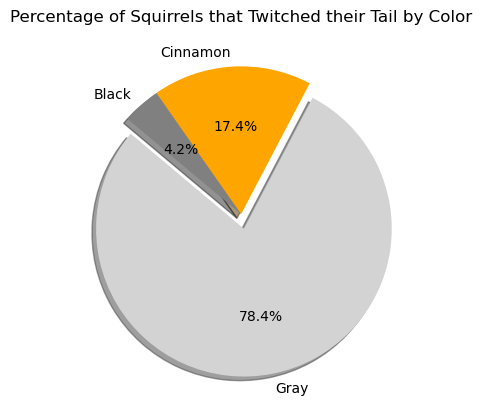

In [17]:
# Lets make a pie chart for the ones that ran from, breaking it down by color
labels = ["Gray", "Cinnamon", "Black"]
sizes = twitches_df["count"]
colors = ["lightgray", "orange", "grey"]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Percentage of Squirrels that Twitched their Tail by Color")

plt.show()

In [18]:
# Filter down DF to rows where a given behavior is True
# In this case, lets narrow it to where Indifferent is True
indifferent = squirrel_df[squirrel_df["Indifferent"] == True]

# Reset Index
indifferent = indifferent.reset_index(drop=True)

indifferent.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.968361,40.772591,11H-AM-1010-03,11H,AM,10102018,3,Adult,Cinnamon,White,...,False,False,False,False,True,False,True,False,NaN,POINT (-73.9683613516225 40.7725908847499)
1,-73.958269,40.791737,33F-AM-1008-02,33F,AM,10082018,2,Adult,Gray,NaN,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9582694312289 40.7917367820255)
2,-73.972250,40.774288,11D-AM-1010-03,11D,AM,10102018,3,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9722500196844 40.7742879599026)
3,-73.969506,40.782351,20B-PM-1013-05,20B,PM,10132018,5,Adult,Gray,White,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9695063535333 40.7823507678183)
4,-73.964003,40.782031,22F-PM-1014-06,22F,PM,10142018,6,Adult,Gray,NaN,...,False,False,False,False,True,False,True,False,NaN,POINT (-73.9640032826529 40.7820309825448)


In [19]:
# What is the breakdown of the number of squirrels with each fur color that was indifferent?
indifferent_df = pd.DataFrame(indifferent["Primary Fur Color"].value_counts())
indifferent_df

,count
Primary Fur Color,
Gray,1219
Cinnamon,181
Black,44


In [20]:
# Lets figure out what percentage of squirrels of a given color exhibit a behavior.
indifferent_percent = pd.merge(indifferent_df, population_df, on="Primary Fur Color")

# Rename columns
indifferent_percent = indifferent_percent.rename(columns={"count_x": "Indifferent", "count_y": "Population"})
indifferent_percent["Indifferent_Percentage"] = indifferent_percent["Indifferent"] / indifferent_percent["Population"]
indifferent_percent["Indifferent_Percentage"] = indifferent_percent["Indifferent_Percentage"].map("{:,.2%}".format)

indifferent_percent

,Indifferent,Population,Indifferent_Percentage
Primary Fur Color,,,
Gray,1219,2473,49.29%
Cinnamon,181,392,46.17%
Black,44,103,42.72%


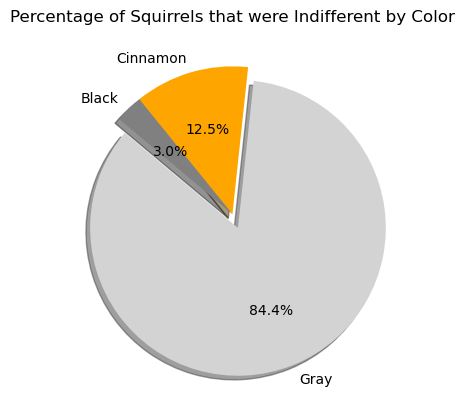

In [21]:
# Lets make a pie chart for the ones that flagged, breaking it down by color
labels = ["Gray", "Cinnamon", "Black"]
sizes = indifferent_df["count"]
colors = ["lightgray", "orange", "grey"]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Percentage of Squirrels that were Indifferent by Color")

plt.show()

In [22]:
# Filter down DF to rows where a given behavior is True
# In this case, lets narrow it to where Runs from is True
runs_from = squirrel_df[squirrel_df["Runs from"] == True]

# Reset Index
runs_from = runs_from.reset_index(drop=True)

runs_from.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
1,-73.967063,40.773499,12I-AM-1013-01,12I,AM,10132018,1,Adult,Cinnamon,White,...,False,False,False,False,True,False,False,True,NaN,POINT (-73.9670628558161 40.77349914209411)
2,-73.967179,40.786735,25A-AM-1013-04,25A,AM,10132018,4,NaN,Gray,White,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9671786715256 40.7867352791232)
3,-73.966244,40.789038,28A-PM-1007-05,28A,PM,10072018,5,Adult,Cinnamon,NaN,...,False,False,False,False,True,False,False,True,NaN,POINT (-73.9662438996681 40.7890381809441)
4,-73.963916,40.789177,29C-AM-1007-06,29C,AM,10072018,6,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9639159298446 40.7891774637988)


In [23]:
# What is the breakdown of the number of squirrels with each fur color that ran from?
runs_from_df = pd.DataFrame(runs_from["Primary Fur Color"].value_counts())
runs_from_df

,count
Primary Fur Color,
Gray,551
Cinnamon,87
Black,32


In [24]:
# Lets figure out what percentage of squirrels of a given color exhibit a behavior.
runs_from_percent = pd.merge(runs_from_df, population_df, on="Primary Fur Color")

# Rename columns
runs_from_percent = runs_from_percent.rename(columns={"count_x": "Runs_From", "count_y": "Population"})
runs_from_percent["Runs_From_Percentage"] = runs_from_percent["Runs_From"] / runs_from_percent["Population"]
runs_from_percent["Runs_From_Percentage"] = runs_from_percent["Runs_From_Percentage"].map("{:,.2%}".format)

runs_from_percent

,Runs_From,Population,Runs_From_Percentage
Primary Fur Color,,,
Gray,551,2473,22.28%
Cinnamon,87,392,22.19%
Black,32,103,31.07%


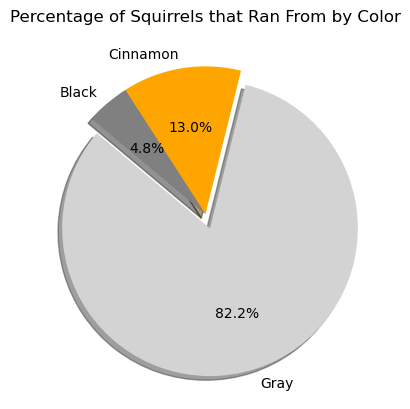

In [25]:
# Lets make a pie chart for the ones that ran from, breaking it down by color
labels = ["Gray", "Cinnamon", "Black"]
sizes = runs_from_df["count"]
colors = ["lightgray", "orange", "grey"]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Percentage of Squirrels that Ran From by Color")

plt.show()

In [26]:
# Merge the percentages for behaviors
behaviors_pct_df = pd.merge(population_df, approaches_percent, on="Primary Fur Color")
behaviors_pct2_df = pd.merge(indifferent_percent, runs_from_percent, on="Primary Fur Color")

behaviors_pct_df = pd.merge(behaviors_pct_df, behaviors_pct2_df, on="Primary Fur Color")
behaviors_pct_df

,count,Approaches,Population,Approaches_Percentage,Indifferent,Population_x,Indifferent_Percentage,Runs_From,Population_y,Runs_From_Percentage
Primary Fur Color,,,,,,,,,,
Gray,2473,126,2473,5.10%,1219,2473,49.29%,551,2473,22.28%
Cinnamon,392,44,392,11.22%,181,392,46.17%,87,392,22.19%
Black,103,6,103,5.83%,44,103,42.72%,32,103,31.07%


In [27]:
# Drop unnecessary columns
behaviors_pct_df = behaviors_pct_df.drop(columns=["count", "Approaches", "Indifferent", "Population_x",
                                                 "Runs_From", "Population_y"])
behaviors_pct_df

,Population,Approaches_Percentage,Indifferent_Percentage,Runs_From_Percentage
Primary Fur Color,,,,
Gray,2473,5.10%,49.29%,22.28%
Cinnamon,392,11.22%,46.17%,22.19%
Black,103,5.83%,42.72%,31.07%


In [28]:
# Grab data for vocalizations as well. Kuks, Quas, and Moans
# Make percentage columns
# Merge and drop extra columns

In [29]:
# Filter down DF to rows where a given behavior is True
# In this case, lets narrow it to where Kuks is True
kuks = squirrel_df[squirrel_df["Kuks"] == True]

# Reset Index
kuks = kuks.reset_index(drop=True)

kuks.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.970182,40.776653,14E-AM-1008-09,14E,AM,10082018,9,Adult,Gray,NaN,...,True,False,False,False,False,False,False,True,NaN,POINT (-73.9701824825872 40.7766530579293)
1,-73.954401,40.795069,38F-PM-1013-05,38F,PM,10132018,5,Juvenile,Gray,Cinnamon,...,True,True,False,False,False,False,False,False,NaN,POINT (-73.9544007658685 40.7950689723135)
2,-73.967115,40.777262,16G-AM-1010-03,16G,AM,10102018,3,Adult,Gray,White,...,True,False,False,False,False,False,False,True,NaN,POINT (-73.9671147090087 40.7772624641112)
3,-73.976343,40.768635,4D-PM-1008-11,04D,PM,10082018,11,Adult,Cinnamon,"Gray, White",...,True,False,False,True,False,False,False,True,NaN,POINT (-73.9763430829342 40.7686351097159)
4,-73.957053,40.799097,41B-AM-1010-07,41B,AM,10102018,7,Adult,Cinnamon,"Gray, White",...,True,False,False,True,False,True,False,False,mad!,POINT (-73.9570528770427 40.7990973804149)


In [30]:
# What is the breakdown of the number of squirrels with each fur color that used Kuks?
kuks_df = pd.DataFrame(kuks["Primary Fur Color"].value_counts())
kuks_df

,count
Primary Fur Color,
Gray,79
Cinnamon,10
Black,3


In [31]:
# Lets figure out what percentage of squirrels of a given color exhibit a behavior.
kuks_percent = pd.merge(kuks_df, population_df, on="Primary Fur Color")

# Rename columns
kuks_percent = kuks_percent.rename(columns={"count_x": "Kuks", "count_y": "Population"})
kuks_percent["Kuks_Percentage"] = kuks_percent["Kuks"] / kuks_percent["Population"]
kuks_percent["Kuks_Percentage"] = kuks_percent["Kuks_Percentage"].map("{:,.2%}".format)

kuks_percent

,Kuks,Population,Kuks_Percentage
Primary Fur Color,,,
Gray,79,2473,3.19%
Cinnamon,10,392,2.55%
Black,3,103,2.91%


In [32]:
# Filter down DF to rows where a given behavior is True
# In this case, lets narrow it to where Quaas is True
quaas = squirrel_df[squirrel_df["Quaas"] == True]

# Reset Index
quaas = quaas.reset_index(drop=True)

quaas.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956576,40.799246,42C-AM-1007-02,42C,AM,10072018,2,NaN,NaN,NaN,...,False,True,False,False,False,False,False,False,NaN,POINT (-73.9565759733611 40.7992461674802)
1,-73.954401,40.795069,38F-PM-1013-05,38F,PM,10132018,5,Juvenile,Gray,Cinnamon,...,True,True,False,False,False,False,False,False,NaN,POINT (-73.9544007658685 40.7950689723135)
2,-73.978242,40.772467,7A-AM-1006-01,07A,AM,10062018,1,Adult,Gray,White,...,False,True,False,False,True,False,False,False,looked at us,POINT (-73.9782417115139 40.7724665036447)
3,-73.958847,40.796385,38B-AM-1019-05,38B,AM,10192018,5,Adult,Gray,NaN,...,False,True,False,False,False,False,False,False,NaN,POINT (-73.9588468413094 40.7963852299012)
4,-73.953433,40.793256,37H-AM-1018-03,37H,AM,10182018,3,Adult,Gray,White,...,False,True,False,False,False,False,False,True,NaN,POINT (-73.9534333425633 40.7932564163328)


In [33]:
# What is the breakdown of the number of squirrels with each fur color that used Quaas?
quaas_df = pd.DataFrame(quaas["Primary Fur Color"].value_counts())
quaas_df

,count
Primary Fur Color,
Gray,35
Cinnamon,5
Black,5


In [34]:
# Lets figure out what percentage of squirrels of a given color exhibit a behavior.
quaas_percent = pd.merge(quaas_df, population_df, on="Primary Fur Color")

# Rename columns
quaas_percent = quaas_percent.rename(columns={"count_x": "Quaas", "count_y": "Population"})
quaas_percent["Quaas_Percentage"] = quaas_percent["Quaas"] / quaas_percent["Population"]
quaas_percent["Quaas_Percentage"] = quaas_percent["Quaas_Percentage"].map("{:,.2%}".format)

quaas_percent

,Quaas,Population,Quaas_Percentage
Primary Fur Color,,,
Gray,35,2473,1.42%
Cinnamon,5,392,1.28%
Black,5,103,4.85%


In [35]:
# Filter down DF to rows where a given behavior is True
# In this case, lets narrow it to where Moans is True
moans = squirrel_df[squirrel_df["Moans"] == True]

# Reset Index
moans = moans.reset_index(drop=True)

moans.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.952229,40.797699,42G-PM-1014-01,42G,PM,10142018,1,Adult,Gray,White,...,False,False,True,False,False,False,False,True,NaN,POINT (-73.9522291603405 40.7976985385835)
1,-73.967741,40.776358,15G-PM-1019-08,15G,PM,10192018,8,Adult,NaN,NaN,...,False,True,True,False,False,False,False,False,NaN,POINT (-73.9677409841969 40.7763579140639)
2,-73.961543,40.790742,31D-AM-1014-01,31D,AM,10142018,1,NaN,Gray,Cinnamon,...,False,False,True,False,False,False,False,True,runs from (dogs!),POINT (-73.9615429203441 40.7907417648701)


In [36]:
# What is the breakdown of the number of squirrels with each fur color that used Moans?
moans_df = pd.DataFrame(moans["Primary Fur Color"].value_counts())
moans_df

,count
Primary Fur Color,
Gray,2


In [37]:
# Lets figure out what percentage of squirrels of a given color exhibit a behavior.
moans_percent = pd.merge(moans_df, population_df, on="Primary Fur Color")

# Rename columns
moans_percent = moans_percent.rename(columns={"count_x": "Moans", "count_y": "Population"})
moans_percent["Moans_Percentage"] = moans_percent["Moans"] / moans_percent["Population"]
moans_percent["Moans_Percentage"] = moans_percent["Moans_Percentage"].map("{:,.2%}".format)

moans_percent

,Moans,Population,Moans_Percentage
Primary Fur Color,,,
Gray,2,2473,0.08%


In [38]:
# Merge the percentages for vocalizations
vocalizations_pct_df = pd.merge(population_df, kuks_percent, on="Primary Fur Color")
vocalizations_pct2_df = pd.merge(quaas_percent, moans_percent, on="Primary Fur Color", how="left")

vocalizations_pct_df = pd.merge(vocalizations_pct_df, vocalizations_pct2_df, on="Primary Fur Color")
vocalizations_pct_df

,count,Kuks,Population,Kuks_Percentage,Quaas,Population_x,Quaas_Percentage,Moans,Population_y,Moans_Percentage
Primary Fur Color,,,,,,,,,,
Gray,2473,79,2473,3.19%,35,2473,1.42%,2.0,2473.0,0.08%
Cinnamon,392,10,392,2.55%,5,392,1.28%,NaN,NaN,NaN
Black,103,3,103,2.91%,5,103,4.85%,NaN,NaN,NaN


In [39]:
vocalizations_pct_df = vocalizations_pct_df.drop(columns=["count", "Kuks", "Quaas", "Population_x",
                                                 "Moans", "Population_y"])
vocalizations_pct_df

,Population,Kuks_Percentage,Quaas_Percentage,Moans_Percentage
Primary Fur Color,,,,
Gray,2473,3.19%,1.42%,0.08%
Cinnamon,392,2.55%,1.28%,NaN
Black,103,2.91%,4.85%,NaN


In [40]:
# Filter down DF to rows where a given behavior is True
# In this case, lets narrow it to where Tail twitches is True
twitches = squirrel_df[squirrel_df["Tail twitches"] == True]

# Reset Index
twitches = twitches.reset_index(drop=True)

twitches.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.968361,40.772591,11H-AM-1010-03,11H,AM,10102018,3,Adult,Cinnamon,White,...,False,False,False,False,True,False,True,False,NaN,POINT (-73.9683613516225 40.7725908847499)
1,-73.967429,40.782972,21C-PM-1006-01,21C,PM,10062018,1,Adult,Gray,NaN,...,False,False,False,True,True,False,False,False,NaN,POINT (-73.9674285955293 40.7829723919744)
2,-73.964003,40.782031,22F-PM-1014-06,22F,PM,10142018,6,Adult,Gray,NaN,...,False,False,False,False,True,False,True,False,NaN,POINT (-73.9640032826529 40.7820309825448)
3,-73.964987,40.776493,16I-AM-1008-01,16I,AM,10082018,1,Adult,Cinnamon,"Gray, White",...,False,False,False,False,True,False,True,False,NaN,POINT (-73.9649866016038 40.7764929694457)
4,-73.967063,40.773499,12I-AM-1013-01,12I,AM,10132018,1,Adult,Cinnamon,White,...,False,False,False,False,True,False,False,True,NaN,POINT (-73.9670628558161 40.77349914209411)


In [41]:
twitches_df = pd.DataFrame(twitches["Primary Fur Color"].value_counts())
twitches_df

,count
Primary Fur Color,
Gray,338
Cinnamon,75
Black,18


In [43]:
# Lets figure out what percentage of squirrels of a given color exhibit a behavior.
twitches_percent = pd.merge(twitches_df, population_df, on="Primary Fur Color")

# Rename columns
twitches_percent = twitches_percent.rename(columns={"count_x": "Twitches", "count_y": "Population"})
twitches_percent["Twitches_Percentage"] = twitches_percent["Twitches"] / twitches_percent["Population"]
twitches_percent["Twitches_Percentage"] = twitches_percent["Twitches_Percentage"].map("{:,.2%}".format)

twitches_percent

,Twitches,Population,Twitches_Percentage
Primary Fur Color,,,
Gray,338,2473,13.67%
Cinnamon,75,392,19.13%
Black,18,103,17.48%


In [44]:
# Filter down DF to rows where a given behavior is True
# In this case, lets narrow it to where Tail twitches is True
flags = squirrel_df[squirrel_df["Tail flags"] == True]

# Reset Index
flags = flags.reset_index(drop=True)

flags.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.967429,40.782972,21C-PM-1006-01,21C,PM,10062018,1,Adult,Gray,NaN,...,False,False,False,True,True,False,False,False,NaN,POINT (-73.9674285955293 40.7829723919744)
1,-73.967113,40.778486,17F-AM-1007-07,17F,AM,10072018,7,Adult,Gray,White,...,False,False,False,True,False,False,True,False,NaN,POINT (-73.9671130680114 40.7784859700171)
2,-73.974207,40.775796,12B-AM-1007-01,12B,AM,10072018,1,Adult,Gray,Cinnamon,...,False,False,False,True,False,False,True,False,NaN,POINT (-73.9742073452913 40.7757957380463)
3,-73.954665,40.794764,38G-PM-1020-09,38G,PM,10202018,9,Adult,Gray,"Cinnamon, White",...,False,False,False,True,False,False,True,False,NaN,POINT (-73.9546654184146 40.7947639241491)
4,-73.964475,40.788384,28C-PM-1006-01,28C,PM,10062018,1,Adult,Gray,Cinnamon,...,False,False,False,True,False,False,False,True,gnd to tree,POINT (-73.964474836001 40.7883840104749)


In [45]:
flags_df = pd.DataFrame(flags["Primary Fur Color"].value_counts())
flags_df

,count
Primary Fur Color,
Gray,122
Cinnamon,26
Black,6


In [46]:
# Lets figure out what percentage of squirrels of a given color exhibit a behavior.
# Lets figure out what percentage of squirrels of a given color exhibit a behavior.
flags_percent = pd.merge(flags_df, population_df, on="Primary Fur Color")

# Rename columns
flags_percent = flags_percent.rename(columns={"count_x": "Flags", "count_y": "Population"})
flags_percent["Flags_Percentage"] = flags_percent["Flags"] / twitches_percent["Population"]
flags_percent["Flags_Percentage"] = flags_percent["Flags_Percentage"].map("{:,.2%}".format)

flags_percent

,Flags,Population,Flags_Percentage
Primary Fur Color,,,
Gray,122,2473,4.93%
Cinnamon,26,392,6.63%
Black,6,103,5.83%


In [49]:
# Merge the percentages for vocalizations
tail_movements_pct_df = pd.merge(population_df, twitches_percent, on="Primary Fur Color")
# tail_movements_pct2_df = pd.merge(flags_percent, moans_percent, on="Primary Fur Color", how="left")

tail_movements_pct_df = pd.merge(tail_movements_pct_df, flags_percent, on="Primary Fur Color")
tail_movements_pct_df = tail_movements_pct_df.rename(columns={"count": "Population"})
tail_movements_pct_df

,Population,Twitches,Population_x,Twitches_Percentage,Flags,Population_y,Flags_Percentage
Primary Fur Color,,,,,,,
Gray,2473,338,2473,13.67%,122,2473,4.93%
Cinnamon,392,75,392,19.13%,26,392,6.63%
Black,103,18,103,17.48%,6,103,5.83%


In [50]:
tail_movements_pct_df = tail_movements_pct_df.drop(columns=["Twitches", "Population_x",
                                                 "Flags", "Population_y"])
tail_movements_pct_df

,Population,Twitches_Percentage,Flags_Percentage
Primary Fur Color,,,
Gray,2473,13.67%,4.93%
Cinnamon,392,19.13%,6.63%
Black,103,17.48%,5.83%
